## Neural networks (DSM150-2021-OCT) coursework1                                              
## Student Number: 210422632 

# 1. Introduction

## 1. Title
- Bank marketing

### 1.2 Informations
- The data is related with direct marketing campaigns of a Portuguese banking institution.


- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 


- There are two datasets on the website: 

    1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).

    2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.


- The bank-full.csv dataset is chosen for the coursework



## 1.3 Classification goal
- To predict if the client will subscribe a term deposit (variable y)

## 1.3 Citation
- This dataset is available on http://archive.ics.uci.edu/ml/datasets/Bank+Marketing


- The dataset is public available for research. The details are described in [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
  
  
- Available at: [pdf] http://hdl.handle.net/1822/14838, [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt


## 2. Attribute information:

### 2.1 Input variables:
   #### 2.1.1 Bank client data:
   - 1) Age (numeric)
   
   
   - 2) Job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   
   - 3) Marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   
   - 4) Education (categorical: "unknown","secondary","primary","tertiary")
   
   
   - 5) Default: has credit in default? (binary: "yes","no")
   
   
   - 6) Balance: average yearly balance, in euros (numeric) 
   
   
   - 7) Housing: has housing loan? (binary: "yes","no")
   
   
   - 8) Loan: has personal loan? (binary: "yes","no")
   
   
   - 9) Contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
   
   - 10) Day: last contact day of the month (numeric)
   
   
   - 11) Month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   
   - 12) Duration: last contact duration, in seconds (numeric)
   
   
   #### 2.1.2 Other attributes:
   - 13) Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
   
   - 14) Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   
   
   - 15) Previous: number of contacts performed before this campaign and for this client (numeric)
   
   
   - 16) Poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
   

  #### 2.1.3 Output variable (desired target):
   - 17) y - has the client subscribed a term deposit? (binary: "yes","no")

## 3. Methodology

### 3.1 Loading dataset

In [1]:
#Import libraries

import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models
from keras import layers
import keras
from keras.utils.np_utils import to_categorical
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [2]:
#To load data and define data labelled unknown as na values

df = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv',na_values = 'unknown')

In [3]:
#To print first 5 rows of the data

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,NaN,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,NaN,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#To get information of the data

df.info(), len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

(None, 41188)

In [5]:
#To get descriptive Statistics

df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
#To see all co,umns of the data

print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


## 4. Data preprocessing

### 4.1 Dealing with missing values

In [7]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

Column 'Education' has various categories, but they can potentialy be groupped into narrower categories , therefore we will need to inspect what categories are in this column and group them into categories

In [8]:
df['education'].unique()

array(['basic.4y', nan, 'university.degree', 'high.school', 'basic.9y',
       'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [9]:
df['education'] = np.where(df['education'] == 'basic.4y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.9y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'illiterate', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'high.school', 'higher', df['education'])
df['education'] = np.where(df['education'] == 'university.degree', 'higher', df['education'])
df['education'] = np.where(df['education'] == 'professional.course', 'higher', df['education'])

In [10]:
df['education'].unique()

array(['Basic', nan, 'higher'], dtype=object)

nan value in education column will be worked on later with nan values in other columns

In [11]:
# To inspect other columns that have null values 

df['job'].unique(), df['marital'].unique(), df['default'].unique(), df['housing'].unique(), df['loan'].unique()

(array(['blue-collar', 'technician', 'management', 'services', 'retired',
        'admin.', 'housemaid', 'unemployed', 'entrepreneur',
        'self-employed', nan, 'student'], dtype=object),
 array(['married', 'single', 'divorced', nan], dtype=object),
 array([nan, 'no', 'yes'], dtype=object),
 array(['yes', 'no', nan], dtype=object),
 array(['no', 'yes', nan], dtype=object))

After inspecting other columns, only education column will be groupped into a narrower category

### 4.2 Extracting columns that contain the missing values

In [12]:
# To set conditions for missing values

nan_value_condition = np.array(df.isnull().sum() != 0)
nan_value_column = np.where(nan_value_condition)[0]
nan_columns_list = list(df.columns[nan_value_column])

In [13]:
#To make A list to store all the unique values from the columns that contains nan values

nan_column_freq = []

for i in nan_value_column:
    nan_column_freq.append(df.iloc[:, i].value_counts())
    
nan_column_freq

[admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 Name: job, dtype: int64,
 married     24928
 single      11568
 divorced     4612
 Name: marital, dtype: int64,
 higher    26926
 Basic     12531
 Name: education, dtype: int64,
 no     32588
 yes        3
 Name: default, dtype: int64,
 yes    21576
 no     18622
 Name: housing, dtype: int64,
 no     33950
 yes     6248
 Name: loan, dtype: int64]

In [14]:
#To make a list to store all missing values

df_nan_value = df[nan_columns_list]
df_nan_value.isnull().sum() 

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

In [15]:
#To append 'Nan' and its count in the missing colum frequency list

for i in range(6):
    nan_column_freq[i] = nan_column_freq[i].append(pd.Series({'null' : df_nan_value.isnull().sum()[i]}))

nan_column_freq

[admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 null               330
 dtype: int64,
 married     24928
 single      11568
 divorced     4612
 null           80
 dtype: int64,
 higher    26926
 Basic     12531
 null       1731
 dtype: int64,
 no      32588
 yes         3
 null     8597
 dtype: int64,
 yes     21576
 no      18622
 null      990
 dtype: int64,
 no      33950
 yes      6248
 null      990
 dtype: int64]

In [16]:
#To replace nan values with attribute in SimpleImputer

sim = SimpleImputer(strategy = "most_frequent")
sim.fit(df_nan_value)
print('Replace nan values with:\n', sim.statistics_)

Replace nan values with:
 ['admin.' 'married' 'higher' 'no' 'yes' 'no']


In [17]:
# To replace the nan values and to check the results

df_nan = pd.DataFrame(sim.transform(df_nan_value))
df_nan.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Now it can be seen that all nan values has been replaced

In [18]:
#To create a copy of the original dataset 

data = df.copy()
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [19]:
# To replace the nan values with the preprocessed values

data[nan_columns_list] = df_nan
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [20]:
# To print data 

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,higher,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,higher,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,higher,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [21]:
#To binary encoding of class label to be 0 and 1

data['default'] = data['default'].map({'no':0, 'yes':1})
data['housing'] = data['housing'].map({'no':0, 'yes':1})
data['loan'] = data['loan'].map({'no':0, 'yes':1})

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,0,1,0,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,higher,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,higher,0,1,0,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,higher,0,0,0,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,0,1,0,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 5. Exploratory Data Analysis

### 5.1 Statement of common sense baseline

Because I want to predict if the customer will subscribe to the marketting campaign of the bank. First, in this section, I am going to explore the dataset and to seee that in which categorical columns that can best describe the outcome of this marketing campaign. 

In [23]:
#To display numerical feature distribution

#data.hist(figsize=(18,15))

In [24]:
#To see percentage of client subscribed a term deposit

count_no = len(data[data['y']==0])
count_yes = len(data[data['y']==1])
count_no_percent = (count_no/(count_no+count_yes))*100
count_yes_percent = (count_yes/(count_no+count_yes))*100

In [25]:
print(count_no_percent), print(count_yes_percent)

88.73458288821988
11.265417111780131


(None, None)

The percentage calculations show that there are more number of people who will not subscribe to the campaign than people who will say yes to the campaign.

In [26]:
#To see mean of column 'y'
data.groupby('y').mean()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,
0,39.911185,0.000082,0.545912,0.152266,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,0.000000,0.563362,0.147198,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Comments;
- The age of client who subscribe to a term deposit is higher than people who do not subscribe.


- Clients who will not subscribe to the marketing campaign do not contact back after being contacted since the last campaign as it can be seen from the higher number of pdays.


- Both subsriptive and non-subscriptive people have personal loan


- On the contrary, average number of contacts performed during this campaign by the bank for subscriptive clients is lower than non-subscriptive client.


### 5.2 To get more insights of the data

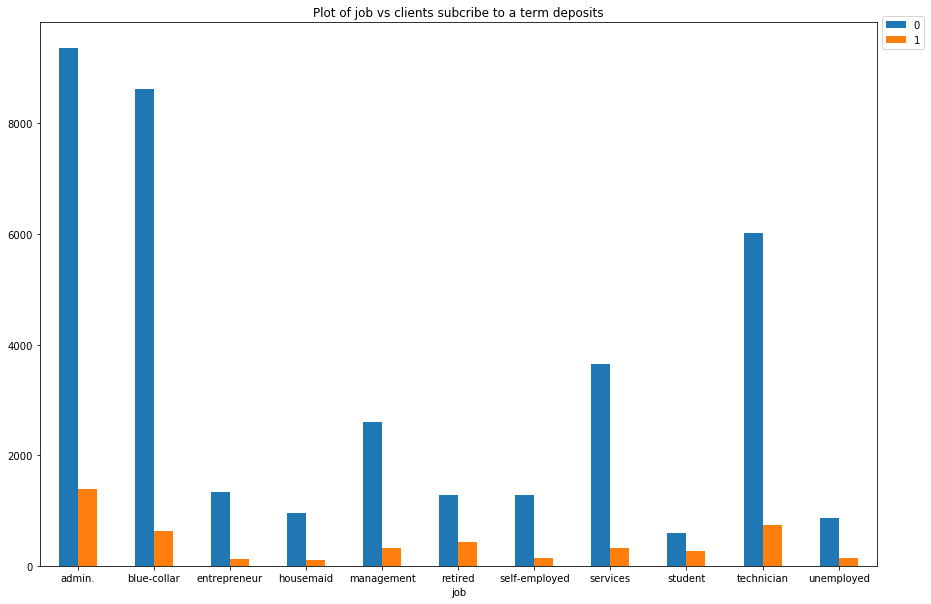

In [27]:
#Column job and y will be visualized by using a plot, because job can be a good predictor of frequency of purchaing

crosstab = pd.crosstab(data.job, data.y)
barplt = crosstab.plot.bar(rot=0, figsize=(15, 10), title="Plot of job vs clients subcribe to a term deposits")
barplt.legend(bbox_to_anchor=(1, 1.02),loc='upper left')

- It can be seen that most people will not subsribe to the term deposit as the bar plots of not subscribe is hogher than subcribe. 

Text(0.5, 1.0, 'Histogram plot of different age groups')

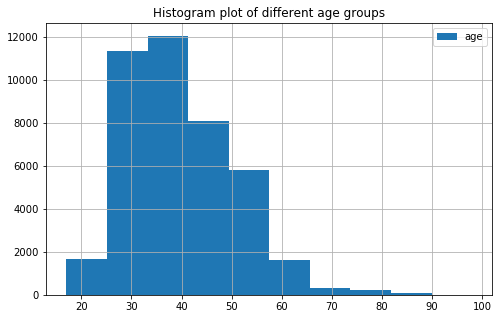

In [28]:
#To visualize column 'age' using histogram, as people indifferent age have different preferration for purchasing 


data.age.hist(figsize = (8,5))
plt.legend(["age"])
plt.title("Histogram plot of different age groups")

- From the histograms, majority of people in the dataset are in the ages between mid 20 years old to 60 years old

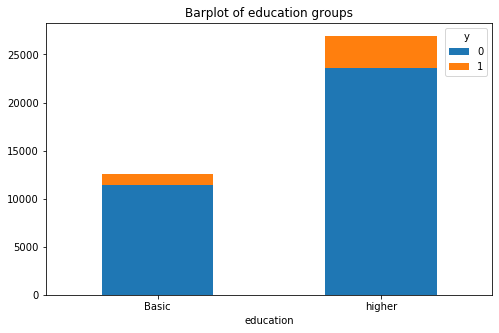

In [29]:
#Education could also be a good predictor 

crosstb = pd.crosstab(df.education, df.y)
plt = crosstb.plot(kind="bar", stacked=True, rot=0, figsize = (8,5), title="Barplot of education groups")


- From the chart, people who has either basic education and higher education tend to not subscribe for the term deposits campaign

In [30]:
#To correlate data to exhibit r2 value
data_corr = data.corr()
data_corr

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.001891,-0.001755,-0.007198,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
default,0.001891,1.000000,-0.003679,-0.003609,-0.005101,-0.003803,0.001668,0.002766,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.001755,-0.003679,1.000000,0.036425,-0.008334,-0.010959,-0.010131,0.021677,-0.059100,-0.077170,-0.032388,-0.058233,-0.045590,0.011085
loan,-0.007198,-0.003609,0.036425,1.000000,0.000121,0.005294,-0.000086,-0.002143,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
duration,-0.000866,-0.005101,-0.008334,0.000121,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.003803,-0.010959,0.005294,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.001668,-0.010131,-0.000086,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.002766,0.021677,-0.002143,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,0.004445,-0.059100,0.001193,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,-0.003141,-0.077170,-0.005944,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211


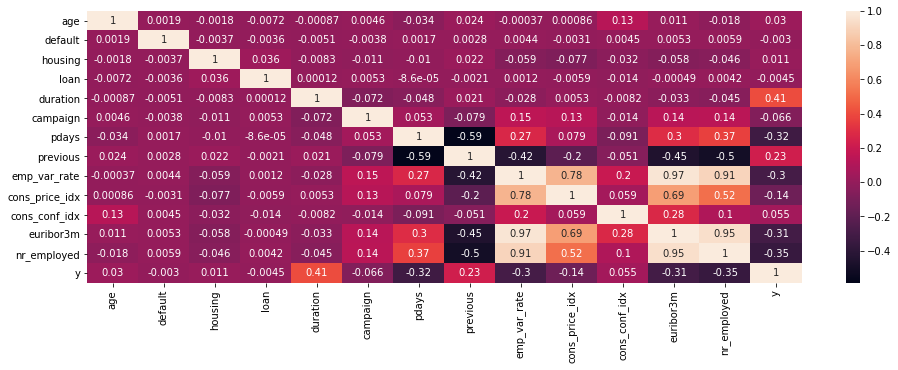

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(data_corr, annot = True);

## 6. Train test data

### 6.1 To prepare data for train test 

In [32]:
#To see data that are in integer format

data_integers = data.select_dtypes(exclude = ['O'])
data_integers

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,0,1,0,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,0,0,0,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,0,1,0,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,0,0,0,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,0,1,0,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0,0,1,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,0,0,0,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,1,1,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,0,0,1,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [33]:
#To create a new copy of the preprocessed dataset and drop columns that are not needed

data2 = data.copy()
data2 = data2.drop(['duration', 'pdays', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'], axis = 1)
data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y
0,44,blue-collar,married,Basic,0,1,0,cellular,aug,thu,1,0,nonexistent,0
1,53,technician,married,higher,0,0,0,cellular,nov,fri,1,0,nonexistent,0
2,28,management,single,higher,0,1,0,cellular,jun,thu,3,2,success,1
3,39,services,married,higher,0,0,0,cellular,apr,fri,2,0,nonexistent,0
4,55,retired,married,Basic,0,1,0,cellular,aug,fri,1,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,higher,0,0,1,telephone,jun,thu,1,0,nonexistent,0
41184,31,housemaid,married,Basic,0,0,0,telephone,may,thu,2,0,nonexistent,0
41185,42,admin.,single,higher,0,1,1,telephone,may,wed,3,0,nonexistent,0
41186,48,technician,married,higher,0,0,1,telephone,oct,tue,2,0,nonexistent,0


In [34]:
# Performing LabelEncoder on the categorical variables

data_str = data2.select_dtypes(include = ['O'])
data_str.columns

Index(['job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'poutcome'],
      dtype='object')

In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
data_encoder = data_str.apply(LabelEncoder().fit_transform)

In [36]:
#To concatenate both the preprocessed dataframes with integer and categorical variables 

data_concat = pd.concat([data_encoder,data_integers], axis = 1)

final_data = pd.DataFrame(data_concat)

In [37]:
final_data.head()

,job,marital,education,contact,month,day_of_week,poutcome,age,default,housing,...,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,1,0,0,1,2,1,44,0,1,...,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,9,1,1,0,7,0,1,53,0,0,...,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,4,2,1,0,4,2,2,28,0,1,...,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,7,1,1,0,0,0,1,39,0,0,...,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,5,1,0,0,1,0,2,55,0,1,...,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [38]:
data_drop_y = data_concat.drop(['y'],axis = 1)
data_drop_y.head()

,job,marital,education,contact,month,day_of_week,poutcome,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1,1,0,0,1,2,1,44,0,1,0,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,9,1,1,0,7,0,1,53,0,0,0,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,4,2,1,0,4,2,2,28,0,1,0,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,7,1,1,0,0,0,1,39,0,0,0,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,5,1,0,0,1,0,2,55,0,1,0,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [39]:
y = data2['y'].values
x = data_drop_y.values

### 6.2 To split data 

In [40]:
# Split dataset to 80:20

tf.random.set_seed(3465656)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# To see shape of splitted data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((32950, 20), (32950,), (8238, 20), (8238,))

### 6.2 Small model for baseline statement

In [42]:
# Using Logistic regression

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
model_small=LogisticRegression(penalty='l2', max_iter=1000)
model_small.fit(x_train, y_train)
prediction=model_small.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.907016266084001

The model using LogisticRegression to prove the baseline, the accuracy score is approx 0.91 which supports the data from EDA section that most people will not subscribe to the marketing campaign. 

In [43]:
y_train = to_categorical(y_train)
y_train.shape

(32950, 2)

In [44]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [45]:
x_train.shape, x_test.shape

((32950, 20), (8238, 20))

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.05)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((31302, 20), (1648, 20), (31302, 2), (1648, 2))

### 6.3 Modeling

In [47]:
# To run model without adding droupout

model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = [20, ]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation = 'relu'),
    #keras.layers.Dense(2, activation = 'sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 586
Trainable params: 538
Non-trainable pa

In [48]:
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.002),metrics=[metrics.binary_accuracy])

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [49]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid),batch_size=512)

Epoch 1/10
62/62 [==============================] - 2s 14ms/step - loss: 3.8129 - binary_accuracy: 0.6200 - val_loss: 2.3189 - val_binary_accuracy: 0.6508
Epoch 2/10
62/62 [==============================] - 0s 4ms/step - loss: 2.1174 - binary_accuracy: 0.7586 - val_loss: 1.3501 - val_binary_accuracy: 0.8155
Epoch 3/10
62/62 [==============================] - 0s 4ms/step - loss: 1.2842 - binary_accuracy: 0.8582 - val_loss: 1.1308 - val_binary_accuracy: 0.8802
Epoch 4/10
62/62 [==============================] - 0s 4ms/step - loss: 1.0390 - binary_accuracy: 0.8889 - val_loss: 0.9892 - val_binary_accuracy: 0.8917
Epoch 5/10
62/62 [==============================] - 0s 4ms/step - loss: 0.8622 - binary_accuracy: 0.8916 - val_loss: 0.8666 - val_binary_accuracy: 0.8856
Epoch 6/10
62/62 [==============================] - 0s 5ms/step - loss: 0.7680 - binary_accuracy: 0.8971 - val_loss: 0.7509 - val_binary_accuracy: 0.8965
Epoch 7/10
62/62 [==============================] - 0s 4ms/step - loss: 0.6

In [50]:
# To get accuracy of the model

loss, acc = model.evaluate(X_valid, y_valid, verbose=1)

52/52 [==============================] - 0s 2ms/step - loss: 0.4875 - binary_accuracy: 0.8978


In [51]:
loss, acc

(0.48745572566986084, 0.8977548480033875)

In [52]:
loss1, acc1 = model.evaluate(X_train, y_train, verbose=1)

979/979 [==============================] - 3s 3ms/step - loss: 0.4901 - binary_accuracy: 0.9032


In [53]:
loss1, acc1

(0.4900650084018707, 0.903232991695404)

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

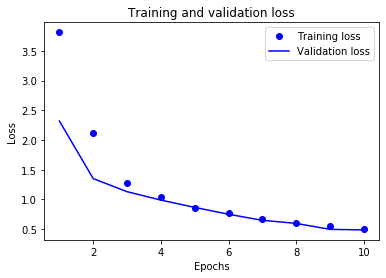

In [55]:
# Creating plots of the trained data

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

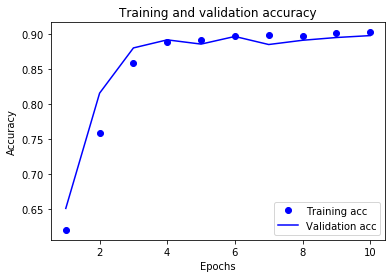

In [56]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
# To run model with adding dropout and changing parameter

model_dropout = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape = [20, ]),
    keras.layers.Dropout(0.3),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dropout(0.4),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation = 'relu'),
    #keras.layers.Dropout(0.99),
    #keras.layers.Dense(2, activation = 'sigmoid'),
    #keras.layers.BatchNormalization()
])

model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                336       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 490
Trainable params: 490
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_dropout.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.002),metrics=[metrics.binary_accuracy])

In [59]:
history_dropout = model_dropout.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid),batch_size=512)

Epoch 1/10
62/62 [==============================] - 1s 6ms/step - loss: 2.0043 - binary_accuracy: 0.6631 - val_loss: 1.2816 - val_binary_accuracy: 0.8447
Epoch 2/10
62/62 [==============================] - 0s 4ms/step - loss: 1.3747 - binary_accuracy: 0.7745 - val_loss: 1.1427 - val_binary_accuracy: 0.8820
Epoch 3/10
62/62 [==============================] - 0s 4ms/step - loss: 1.1915 - binary_accuracy: 0.8085 - val_loss: 1.0232 - val_binary_accuracy: 0.8902
Epoch 4/10
62/62 [==============================] - 0s 4ms/step - loss: 1.0500 - binary_accuracy: 0.8268 - val_loss: 0.7127 - val_binary_accuracy: 0.8944
Epoch 5/10
62/62 [==============================] - 0s 3ms/step - loss: 0.8706 - binary_accuracy: 0.8411 - val_loss: 0.4715 - val_binary_accuracy: 0.8902
Epoch 6/10
62/62 [==============================] - 0s 3ms/step - loss: 0.6908 - binary_accuracy: 0.8328 - val_loss: 0.3962 - val_binary_accuracy: 0.8780
Epoch 7/10
62/62 [==============================] - 0s 4ms/step - loss: 0.60

In [60]:
# To get accuracy of the model

loss, acc = model_dropout.evaluate(X_valid, y_valid, verbose=1)

52/52 [==============================] - 0s 6ms/step - loss: 0.2981 - binary_accuracy: 0.8714


In [61]:
loss, acc

(0.2981078028678894, 0.8713592290878296)

In [62]:
loss1, acc1 = model_dropout.evaluate(X_train, y_train, verbose=1)

979/979 [==============================] - 2s 2ms/step - loss: 0.3176 - binary_accuracy: 0.8795


In [63]:
history_dict_ = history_dropout.history
history_dict_.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

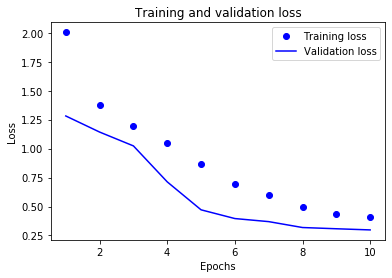

In [64]:
# Creating plots of the trained data

history_dict_ = history_dropout.history
loss_values = history_dict_['loss']
val_loss_values = history_dict_['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


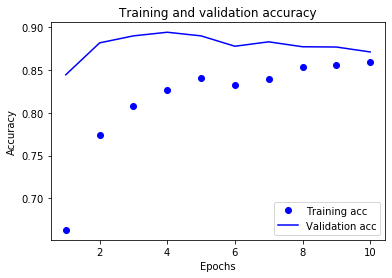

In [65]:
plt.clf()
acc = history_dict_['binary_accuracy']
val_acc = history_dict_['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Discussion

From the Exploratory Data Analysis (EDA) section and the small training model using LogisticRegression, we can assume that most people will not subscribe to the term deposits campaign while few people will subscribe to the campaign.

In this neural netwotk model.The size of the dataset is moderate, thefore, I tend to apply it with smaller units and fewer layers as in this case I use 3 layers, and 32, 16, and 2 for units for both model with adding dropout and model without adding dropout. I chose 10 as an optimal epoch, as we can see from the graphs that after first few epochs, the network beigns to overfit. 

After training the model without adding dropout, we got the accuracy of validation train test set is approximately 0.8971 and the accuracy of train test set is 0.90091. With this very high accuracy, I though the data can be overfitted. Therefore, in the second model I applied dropout to help avoiding overfitting. After applying the dropout the accuracy results have gone down a little bit to approximately 0.8826.  

The plots from both model illustrates that model without dropout, the network in Training and validation loss begins to overfit after 8th epoch and network in Training and validation accuracy begins to overfit after 4th epoch. Similarly to the plot of model with dropout, Training and validation loss begins to overfit after 8th epoch and for Training and validation accuracy begins to overfit after 6th epoch. Therefore, we can infer that with this model adding or not adding dropout will make little change to the network. 

In addition, for both models with and without adding dropout, the Training and validation loss shows that training loss decreases with every epoch, while the training accuracy increases with every epoch. 

To conclude, after doing a neural network modelling, we can deduce the conclusion that more than 90 percent of the clients will not subscribe to the marketing campaign. 



## 8. Reference

UCI Machine Learning Repository: Bank Marketing Data Set. (n.d.). UCI. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Chicago. Chollet, Francois. 2017. Deep Learning with Python. New York, NY: Manning Publications.

RAHUL. (n.d.). kaggle kernels pull captaintyping/end-to-end-ml-on-uci-bank-marketing-dataset. Kaggle. https://www.kaggle.com/captaintyping/end-to-end-ml-on-uci-bank-marketing-dataset

matplotlib.pyplot.legend — Matplotlib 3.5.1 documentation. (n.d.). Matplotlib. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

Ameisen, E. (2018, June 20). Always start with a stupid model, no exceptions. - Insight. Medium. https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa